#### Importing Dependencies

In [1]:
import nltk
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pandas as pd

## Loading the corpus and the results

#### Downloading the brown corpus and universal tagset

In [2]:
nltk.download('universal_tagset')
nltk.download('brown')

[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

#### Checking if we are in the HMM directory

In [3]:
if os.getcwd().endswith('HMM') == False:
    os.chdir('HMM')

##### If the results are not present, run the cross_validation.py file

In [4]:
#if either of HMM_symbolic_results.pkl or HMM_vector_results.pkl are not present, run the cross-validation script
try:
    with open('HMM_symbolic_results.pkl', 'rb') as f:
        HMM_symbolic_results = pickle.load(f)
    with open('HMM_vector_results.pkl', 'rb') as f:
        HMM_vector_results = pickle.load(f)
except:
    print("Running cross-validation script (this may take a while ~7 min) ...")
    #if you are using a Mac, comment out the below line and use the one after it
    os.system('python cross_validation.py')
    #os.system('python3 cross_validation.py')
    with open('HMM_symbolic_results.pkl', 'rb') as f:
        HMM_symbolic_results = pickle.load(f)
    with open('HMM_vector_results.pkl', 'rb') as f:
        HMM_vector_results = pickle.load(f)

## Visualizing the results

In [5]:
TAGSET = HMM_symbolic_results['tag_set']

In [6]:
print("HMM_symbolic model 5-fold cross-validation accuracy:", HMM_symbolic_results['accuracy'])

HMM_symbolic model 5-fold cross-validation accuracy: 0.9520934433271959


#### HMM Viterbi Symbolic Confusion Matrix

<Axes: >

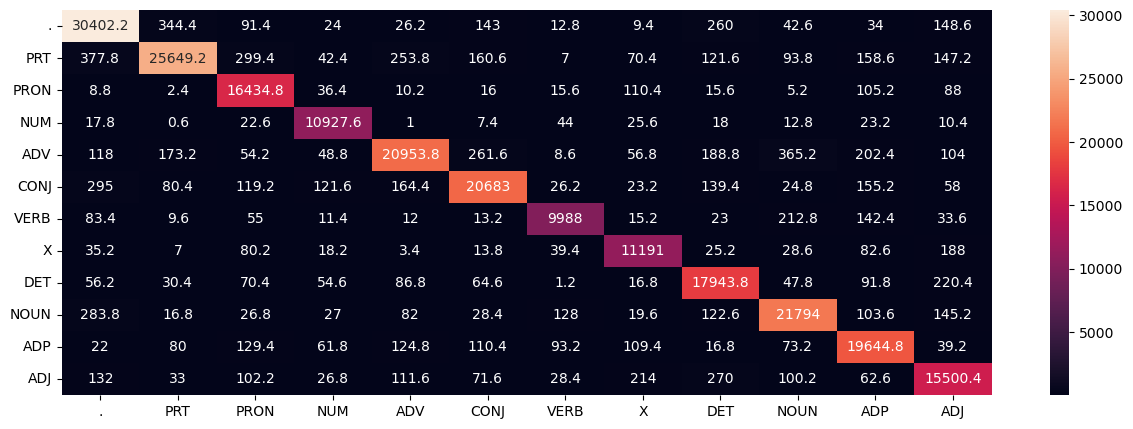

In [7]:
#using sns.heatmap to plot the confusion matrix
plt.figure(figsize=(15,5))
sns.heatmap(HMM_symbolic_results['confusion_matrix'], annot=True, fmt='g', xticklabels=TAGSET , yticklabels=TAGSET )

In [16]:
confusion_matrix = HMM_symbolic_results['confusion_matrix']

In [20]:
def calculate_metrics(confusion_matrix):
    num_tags = confusion_matrix.shape[0]
    accuracy = np.zeros(num_tags)
    precision = np.zeros(num_tags)
    recall = np.zeros(num_tags)
    f1_score = np.zeros(num_tags)
    f2_score = np.zeros(num_tags) 
    f0_5_score = np.zeros(num_tags)

    for i in range(num_tags):
        tp = confusion_matrix[i, i]
        fp = np.sum(confusion_matrix[:, i]) - tp
        fn = np.sum(confusion_matrix[i, :]) - tp
        tn = np.sum(confusion_matrix) - tp - fp - fn
    
        accuracy[i] = (tp + tn) / (tp + tn + fp + fn)
        precision[i] = tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1_score[i] = 2 * precision[i] * recall[i] / (precision[i] + recall[i])
        f2_score[i] = (5 * precision[i] * recall[i]) / (4 * precision[i] + recall[i])
        f0_5_score[i] = (1.25 * precision[i] * recall[i]) / (0.25 * precision[i] + recall[i])

#dataframe to store the scores for each POS
    scores= pd.DataFrame({'Accuracy': accuracy ,'Precision': precision, 'Recall': recall, 
                          'F1 Score': f1_score, 'F2 Score': f2_score, 'F0.5 Score': f0_5_score},index=TAGSET)
    return scores


In [21]:
metrics_symbolic = calculate_metrics(confusion_matrix)
metrics_symbolic

,Accuracy,Precision,Recall,F1 Score,F2 Score,F0.5 Score
.,0.988949,0.955077,0.963968,0.959502,0.962177,0.956842
PRT,0.989190,0.970568,0.936724,0.953346,0.943303,0.963605
PRON,0.993694,0.939905,0.975440,0.957343,0.968120,0.946803
NUM,0.997174,0.958511,0.983494,0.970842,0.978394,0.963405
ADV,0.989417,0.959863,0.929817,0.944601,0.935675,0.953699
CONJ,0.990966,0.958718,0.944843,0.951730,0.947586,0.955911
VERB,0.995625,0.961087,0.942300,0.951601,0.945998,0.957270
X,0.994866,0.943449,0.955467,0.949420,0.953039,0.945828
DET,0.991638,0.937268,0.960342,0.948665,0.955637,0.941793
NOUN,0.991428,0.955835,0.956809,0.956322,0.956614,0.956030


#### HMM Viterbi Vector Confusion Matrix

In [22]:
print("HMM_vector model 5-fold cross-validation accuracy:", HMM_vector_results['accuracy'])

HMM_vector model 5-fold cross-validation accuracy: 0.9520957895531815


<Axes: >

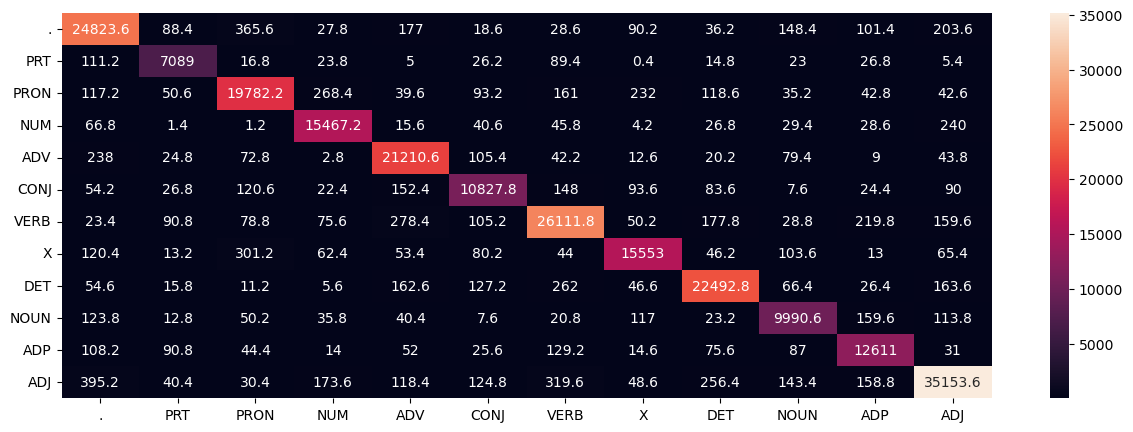

In [23]:
# using sns.heatmap to plot the confusion matrix
plt.figure(figsize=(15,5))
sns.heatmap(HMM_vector_results['confusion_matrix'], annot=True, fmt='g', xticklabels=TAGSET , yticklabels=TAGSET )

In [24]:
confusion_matrix = HMM_vector_results['confusion_matrix'] 
metrics_vector = calculate_metrics(confusion_matrix)
metrics_vector

,Accuracy,Precision,Recall,F1 Score,F2 Score,F0.5 Score
.,0.988379,0.946144,0.950753,0.948443,0.949828,0.947062
PRT,0.996561,0.939588,0.953874,0.946677,0.950982,0.942410
PRON,0.990120,0.947632,0.942755,0.945187,0.943726,0.946653
NUM,0.994779,0.955981,0.968662,0.962280,0.966099,0.958491
ADV,0.992483,0.950918,0.970222,0.960473,0.966299,0.954717
CONJ,0.993204,0.934849,0.929313,0.932073,0.930415,0.933737
VERB,0.988895,0.952902,0.952978,0.952940,0.952963,0.952917
X,0.993055,0.956343,0.945126,0.950701,0.947349,0.954078
DET,0.992157,0.962374,0.959803,0.961087,0.960316,0.961859
NOUN,0.993725,0.929981,0.934085,0.932029,0.933261,0.930799


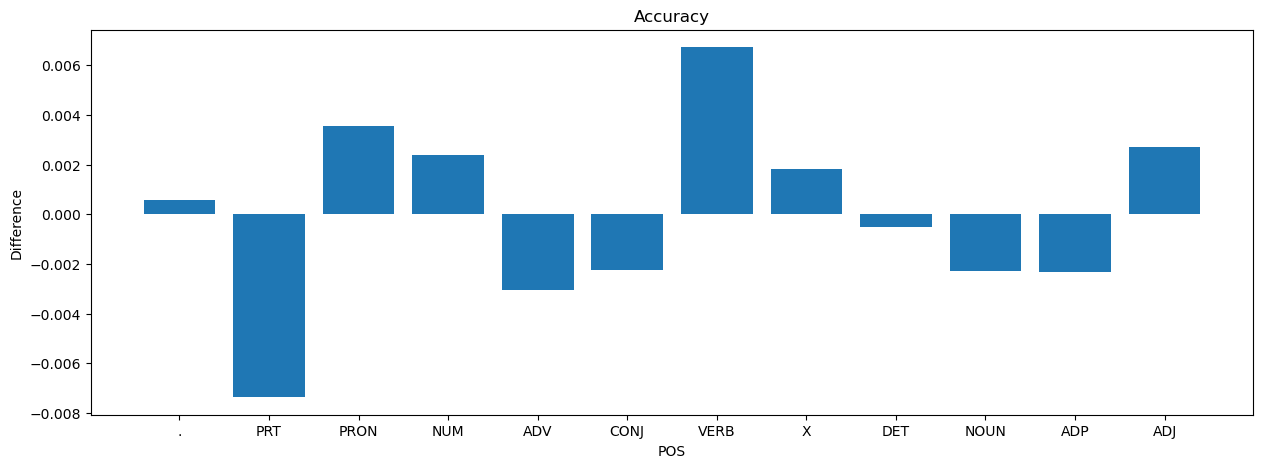

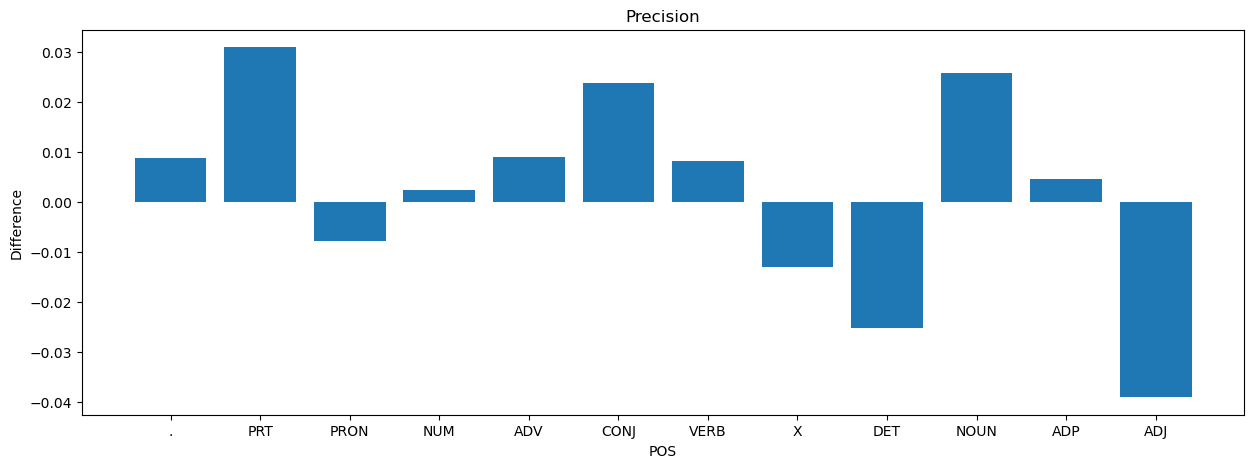

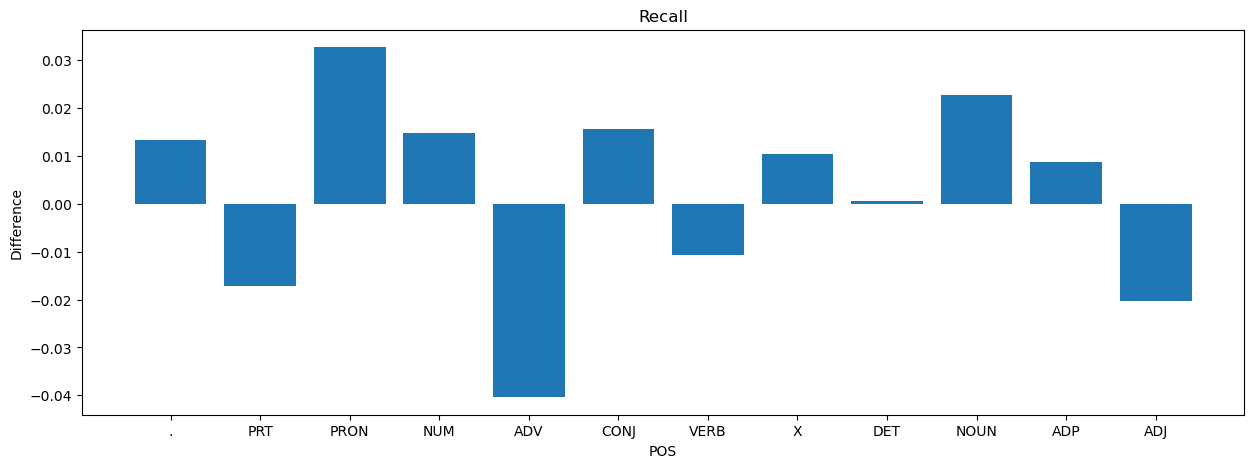

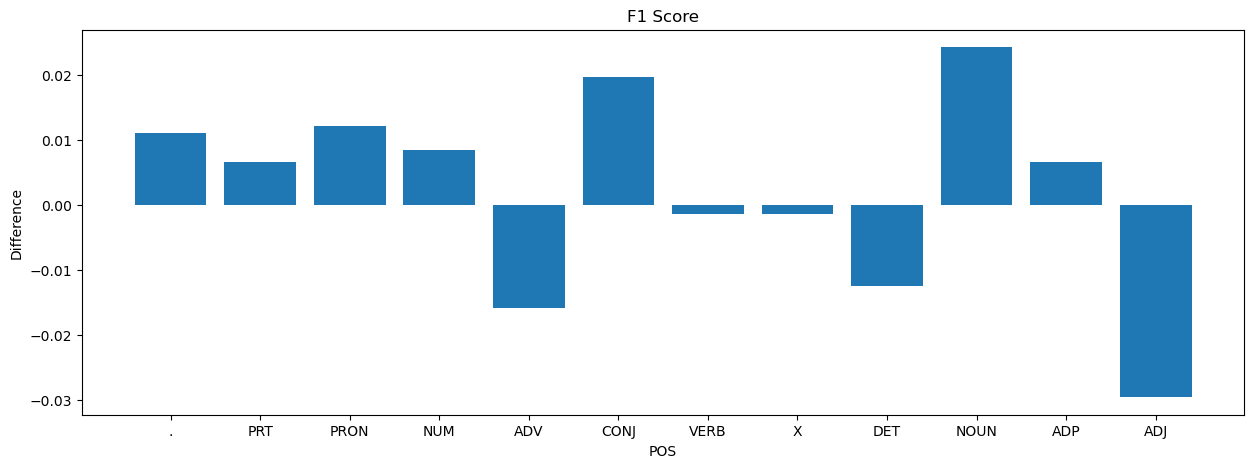

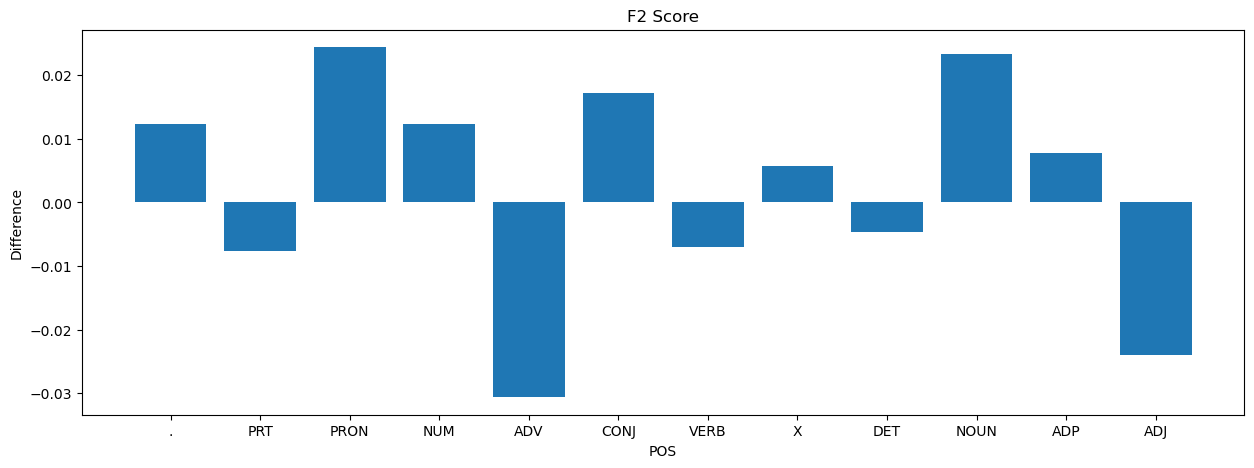

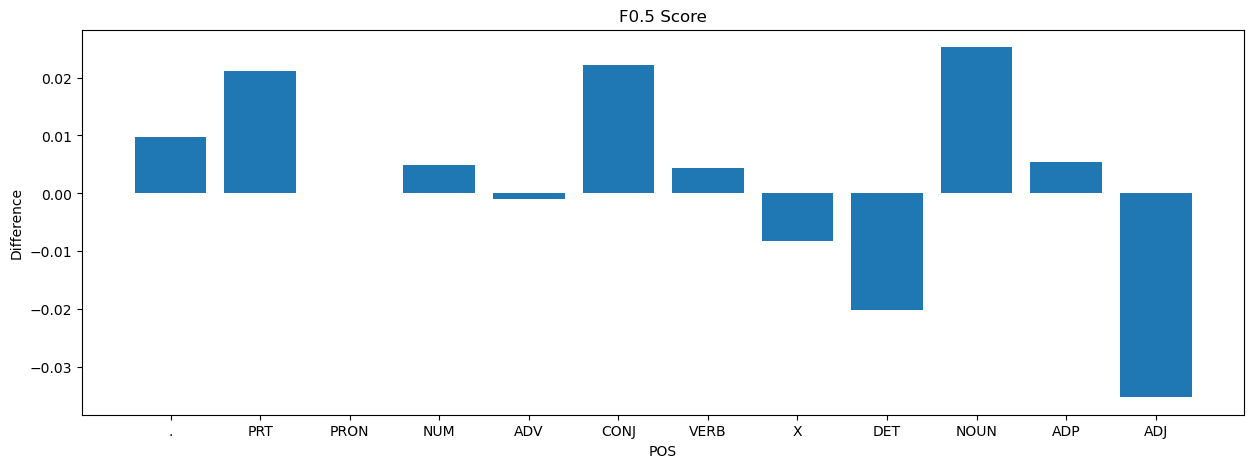

All plots saved in result_plots folder


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def compare_classification_metrics(metrics_df1, metrics_df2):
    """
    Compare classification metrics for each class based on the given dataframes of metrics.
    
    Parameters:
    metrics_df1 (pandas.DataFrame): A dataframe containing the metrics for one set of labels.
    metrics_df2 (pandas.DataFrame): A dataframe containing the metrics for another set of labels.
    
    Returns:
    None
    """
    
    # Loop through each metric and plot a bar chart for each class
    #take HMM symbolic as the baseline
    #save all the subplots separately in a result_plots folder

    if os.path.exists('result_plots') == False:
        os.mkdir('result_plots')

    for metric in metrics_df1.columns:
        #the difference between the two models is the bar chart
        diff = metrics_df1[metric] - metrics_df2[metric]
        #plot the bar chart
        plt.figure(figsize=(15,5))
        plt.bar(metrics_df1.index, diff)
        plt.title(metric)
        plt.xlabel('POS')
        plt.ylabel('Difference')
        plt.savefig('result_plots/' + metric + '.png')
        plt.show()
        
    print("All plots saved in result_plots folder")


compare_classification_metrics(metrics_symbolic, metrics_vector)


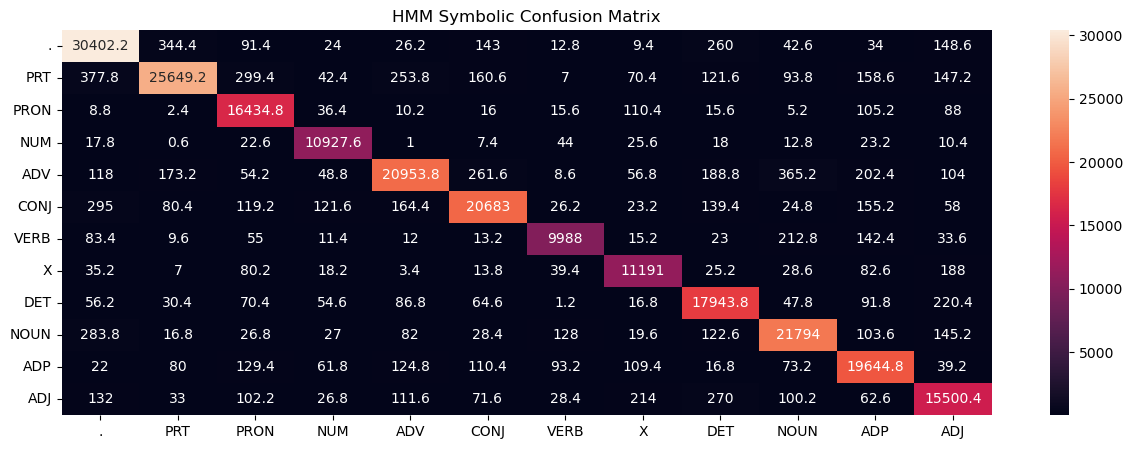

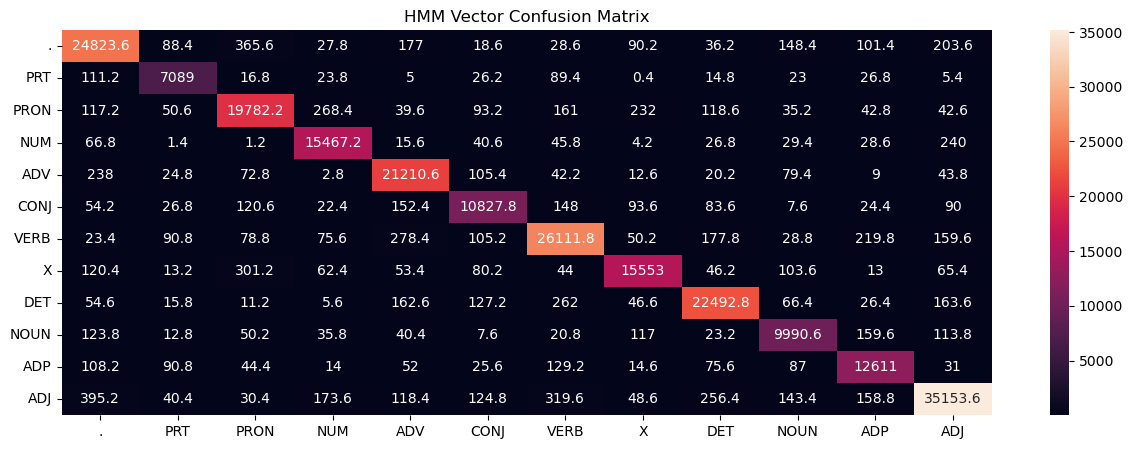

In [38]:
#save both the confusion matrices in a result_plots folder
if os.path.exists('result_plots') == False:
    os.mkdir('result_plots')

plt.figure(figsize=(15,5))
sns.heatmap(HMM_symbolic_results['confusion_matrix'], annot=True, fmt='g', xticklabels=TAGSET , yticklabels=TAGSET )
plt.title('HMM Symbolic Confusion Matrix')
plt.savefig('result_plots/HMM_symbolic_confusion_matrix.png')
plt.show()

plt.figure(figsize=(15,5))
sns.heatmap(HMM_vector_results['confusion_matrix'], annot=True, fmt='g', xticklabels=TAGSET , yticklabels=TAGSET )
plt.title('HMM Vector Confusion Matrix')
plt.savefig('result_plots/HMM_vector_confusion_matrix.png')
plt.show()